In [50]:
for i in range(2,5):
    print(i)

2
3
4


In [11]:
import matplotlib.pyplot as plt
import numpy as np

import math

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

plt.style.use('presentation.mplstyle')

## Compare two things from average_values_suffix.csv

In [42]:
def plot_average_values_comparison(avg_values, color_map, labels, categories, title):

    title_map = {
        'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
        'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
        'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
        'total tardiness': 'Average Total Tardiness (days)', 
        'number of patients tardy': 'Average Number Patients Tardy', 
        'total surgeries completed': 'Average Number of Surgeries Scheduled', 
        'total cancelled inconvenient': 'Average Number of Surgeries Cancelled \ndt Inconvenience',
        'total cancelled overtime': 'Average Number of Surgeries Cancelled \ndt Over Time',
        'cancelation proportion': 'Proportion of Surgeries Cancelled',
        'total time operating': 'Average Time Spent Operating',
        'average overtime': 'Average amount of Overtime Worked',    
        'average utilisation': 'Average Session Utilisation',
    }

    # Get colors for each label
    colors = [color_map[label] for label in labels]

    # Create a 3x3 subplot
    fig, axes = plt.subplots(math.ceil(len(categories)/3), 3, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    num_categories = len(categories)

    # Plot each bar graph
    for i in range(num_categories):
        bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
        axes[i].set_title(title_map[categories[i]], fontsize=16)
        # Add labels
        for bar in bars:
            yval = round(bar.get_height(), 2)
            axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=20)

    for i in range(num_categories, len(axes)):
        fig.delaxes(axes[i])

    # Create custom legend handles
    handles = [Patch(color=color_map[label], label=label) for label in labels]

    # Add the legend to the figure
    fig.legend(handles=handles, loc='lower right', title='Labels', prop={'size': 20})
    fig.suptitle(title, fontsize=24)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

### Compare perfect vs imperfect info (Brodie)

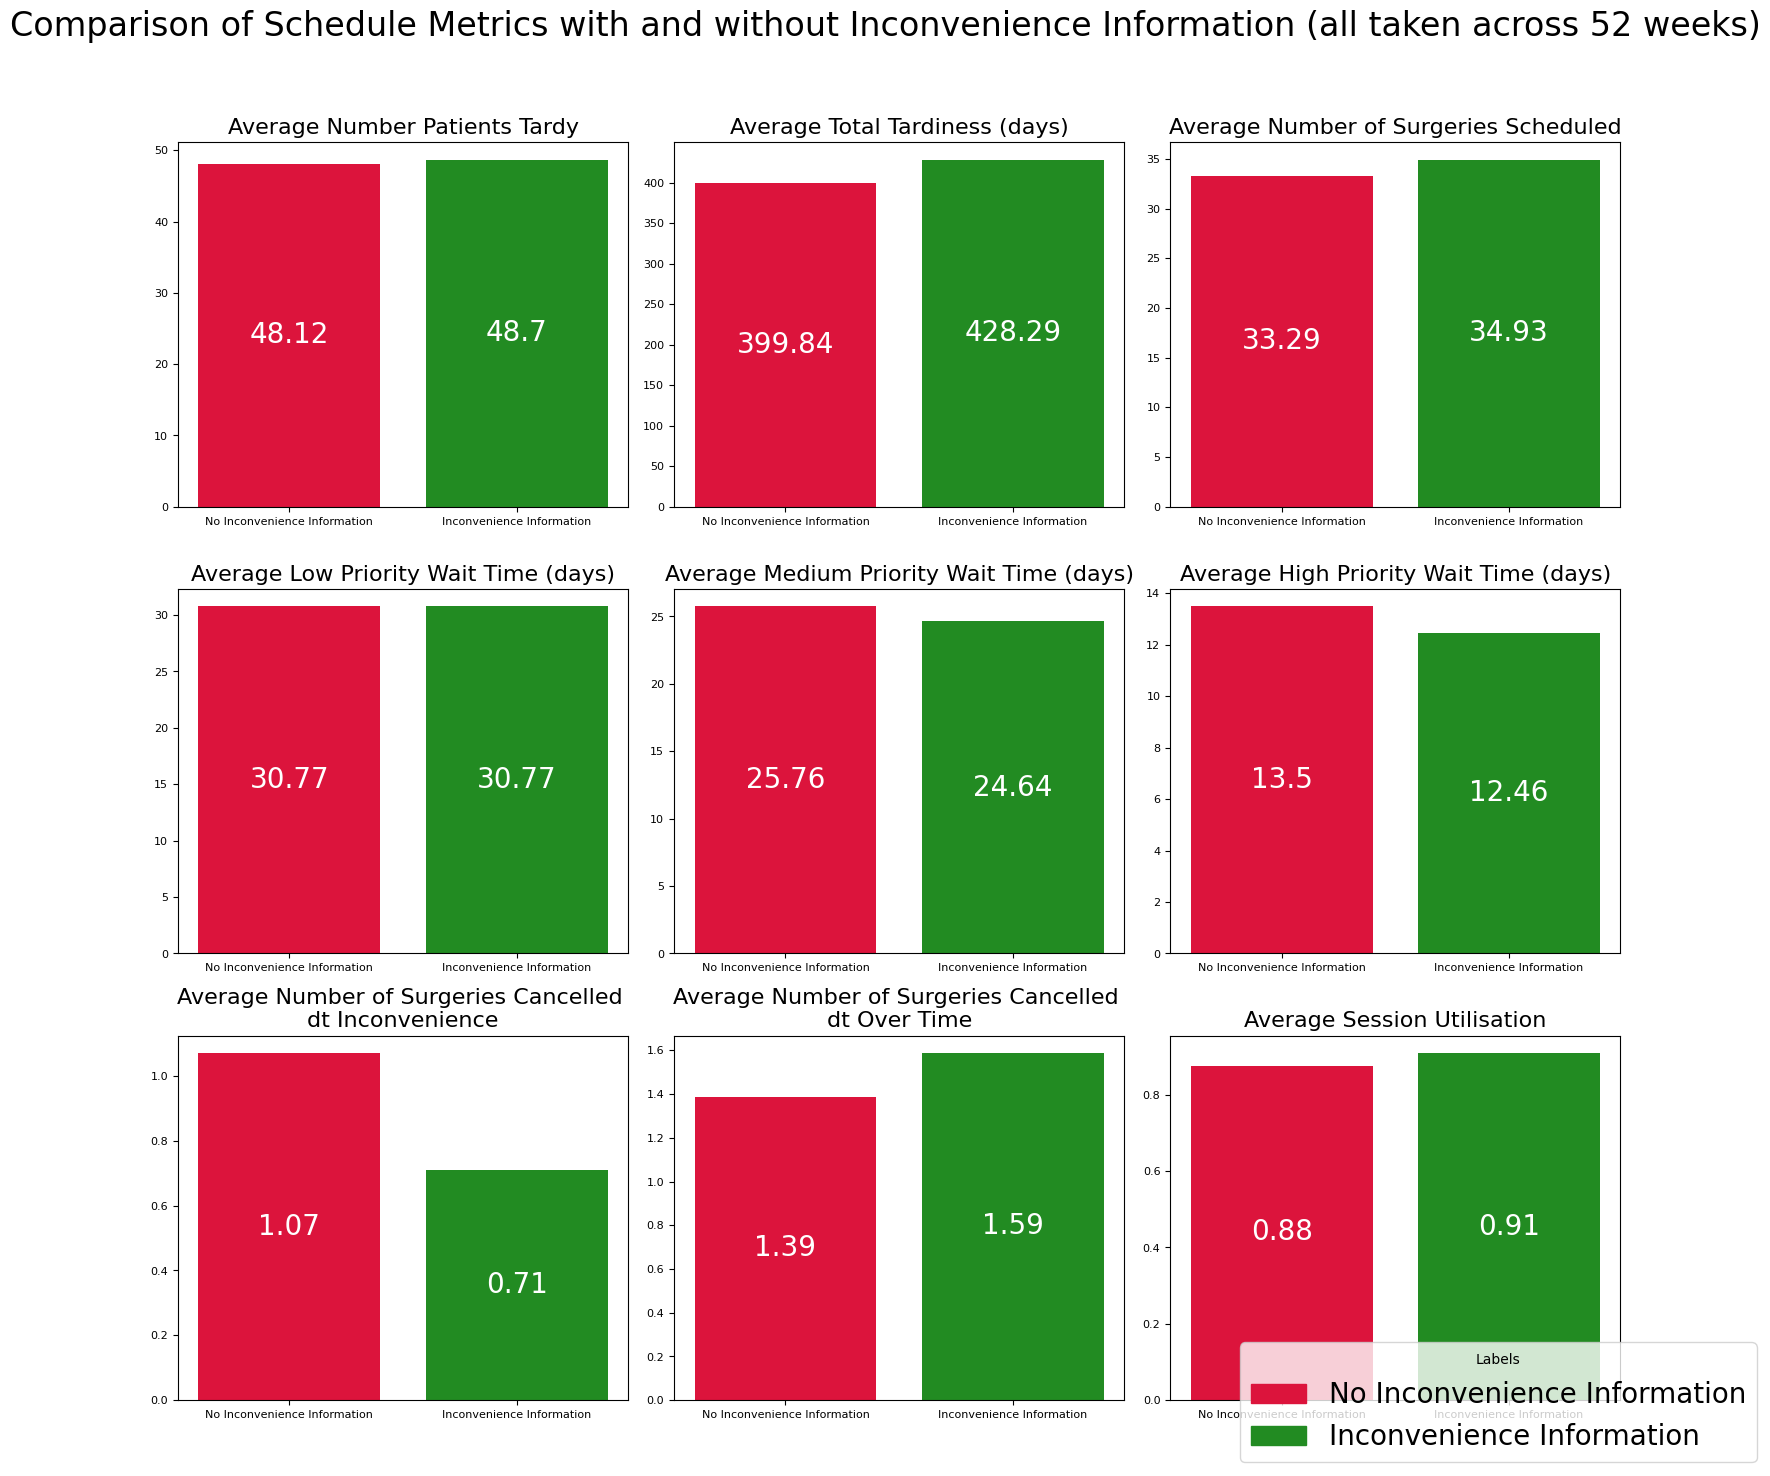

In [35]:
# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))
csv_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_2015-03-01_ed_2016-03-01_ipic_F_pi_T_idc_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_ao_30_dct_91_tl_20_og_05.csv")

#read in df
avg_values_pi = pd.read_csv(csv_path)

# Labels for the bars
labels = ['No Inconvenience Information', 'Inconvenience Information']

# Define colors for each label
color_map = {
    'Inconvenience Information': '#228B22',
    'No Inconvenience Information': '#DC143C',
}

categories = [
        'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

title = "Comparison of Schedule Metrics with and without Inconvenience Information (all taken across 52 weeks)"

plot_average_values_comparison(avg_values=avg_values_pi, labels=labels, color_map=color_map, categories=categories, title=title)


### Compare Disruption Constraint vs no disruption constraint (Brodie)

   Unnamed: 0  perfect_information_bool  num_sessions  total tardiness  \
0           0                     False        6.6875       395.858333   
1           0                     False        6.6875       400.030556   
2           1                      True        6.6875       428.290278   

   number of patients tardy  average wait time (priority < 0.33)  \
0                 39.787500                            30.165778   
1                 48.351389                            30.767432   
2                 48.698611                            30.769484   

   average wait_time (0.33 < priority < 0.66)  \
0                                   25.683691   
1                                   25.824247   
2                                   24.640106   

   average wait time 0.66 < priority  total cancelled overtime  \
0                          18.344975                  1.787500   
1                          13.570980                  1.383333   
2                          12.46387

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (3,).

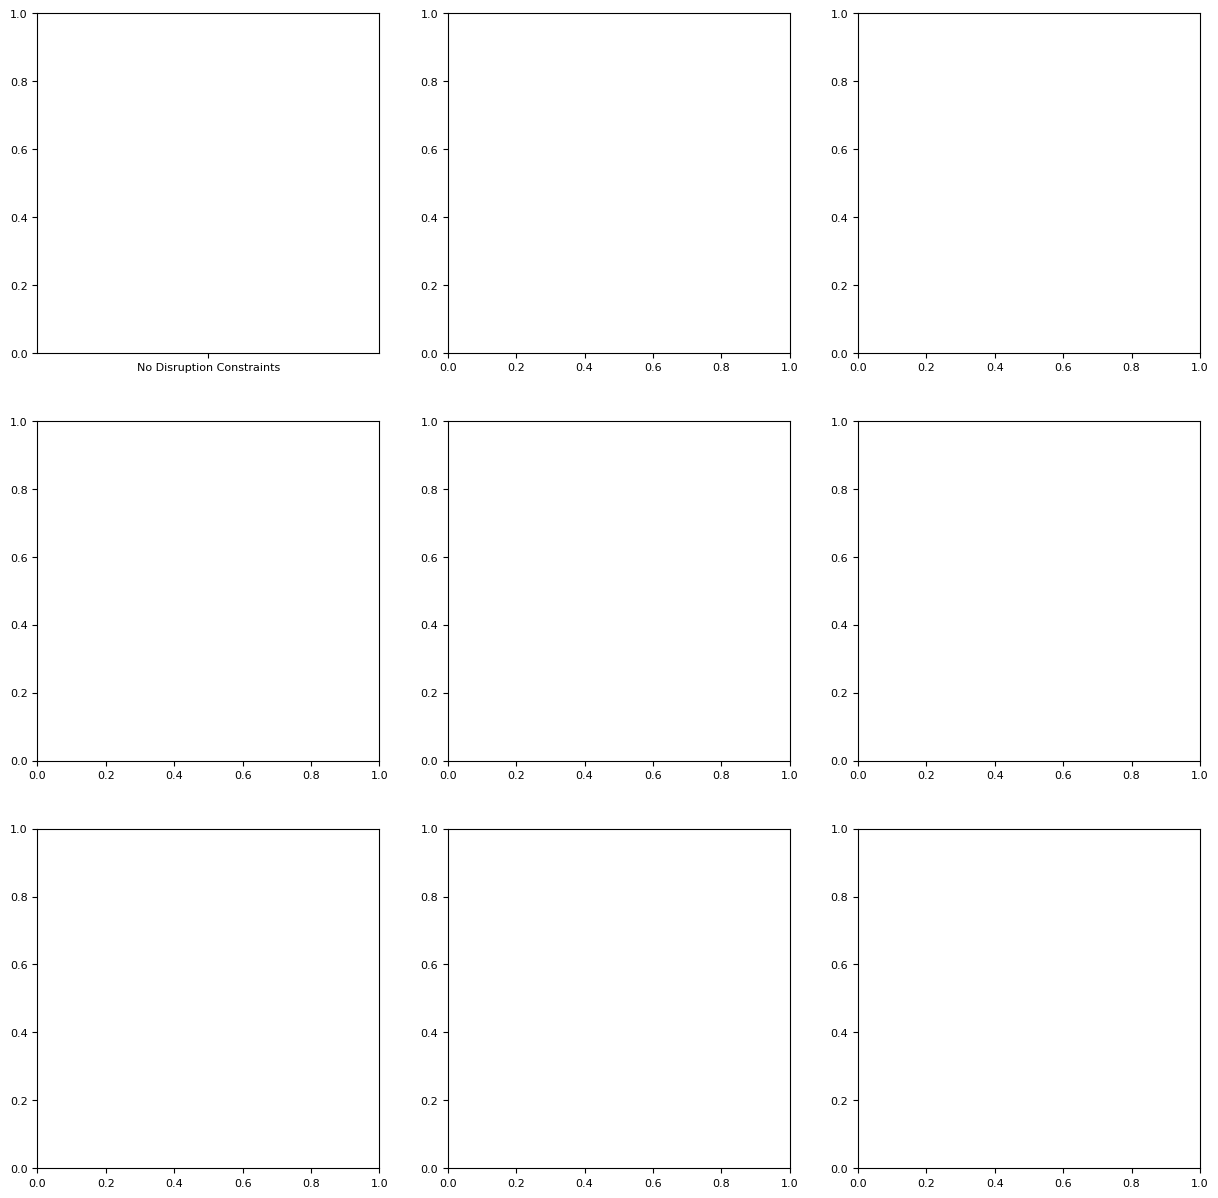

In [44]:
csv_disruption_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_2015-03-01_ed_2016-03-01_ipic_F_pi_F_idc_T_mdp_28_mds_28_ipc_F_pv_50_ioc_F_ao_30_dct_91_tl_20_og_05.csv")
#read in disruption
avg_values_disruption = pd.read_csv(csv_disruption_path)

csv_baseline_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_2015-03-01_ed_2016-03-01_ipic_F_pi_F_idc_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_ao_30_dct_91_tl_20_og_05.csv")
#read in disruption
baseline = pd.read_csv(csv_baseline_path)

avg_values_disruption_comparison = pd.concat([avg_values_disruption, baseline], axis=0, ignore_index=True)

print(avg_values_disruption_comparison)

# Labels for the bars
labels = ['No Disruption Constraints', 'Disruption Constraints']

# Define colors for each label
color_map = {
    'Disruption Constraints': '#4169E1',
    'No Disruption Constraints': '#FFA500',
}

categories = [
        'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

# Get colors for each label
colors = [color_map[label] for label in labels]

plot_average_values_comparison(avg_values=avg_values_disruption_comparison, labels=labels, color_map=color_map, categories=categories, title=title)



## Do Numerical Comparisons of Difference

In [45]:
import pandas as pd
from scipy import stats

csv_pi_path = os.path.join(OUTPUT_DIR, "metricss_0_f_A_sd_2015-03-01_ed_2016-03-01_ipic_F_pi_T_idc_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_ao_30_dct_91_tl_20_og_05.csv")
#load in metrics for perfect_info
pi_metrics = pd.read_csv(csv_pi_path)
#load in metrics for perfect_info

# Separate data by perfect_information_bool
grouped_data = pi_metrics.groupby('perfect_information_bool')

# List to hold the results
results_list = []

# Perform one-sample t-test for each column in columns_to_plot
# against the overall mean of the column or a specified value
for column in categories:
    overall_mean = pi_metrics[column].mean()  # Can be replaced with a specific value if needed
    
    for name, group in grouped_data:
        # Extract data for the current group
        data = group[column].dropna()  # Drop NaN values for the t-test
        
        # Perform the t-test against the overall mean
        t_stat, p_value = stats.ttest_1samp(data, overall_mean)
        
        # Append the result to the list
        results_list.append({
            'Metric': column,
            'perfect_information_bool': name,
            't-statistic': t_stat,
            'p-value': p_value
        })

# Convert the results list to a DataFrame
p_vals = pd.DataFrame(results_list)

# Display the DataFrame
print(p_vals)


                                        Metric  perfect_information_bool  \
0                     number of patients tardy                     False   
1                     number of patients tardy                      True   
2                              total tardiness                     False   
3                              total tardiness                      True   
4                    total surgeries completed                     False   
5                    total surgeries completed                      True   
6          average wait time (priority < 0.33)                     False   
7          average wait time (priority < 0.33)                      True   
8   average wait_time (0.33 < priority < 0.66)                     False   
9   average wait_time (0.33 < priority < 0.66)                      True   
10           average wait time 0.66 < priority                     False   
11           average wait time 0.66 < priority                      True   
12          

### Quantifying disruption constraint difference with plots and t-test

IndexError: index 2 is out of bounds for axis 0 with size 2

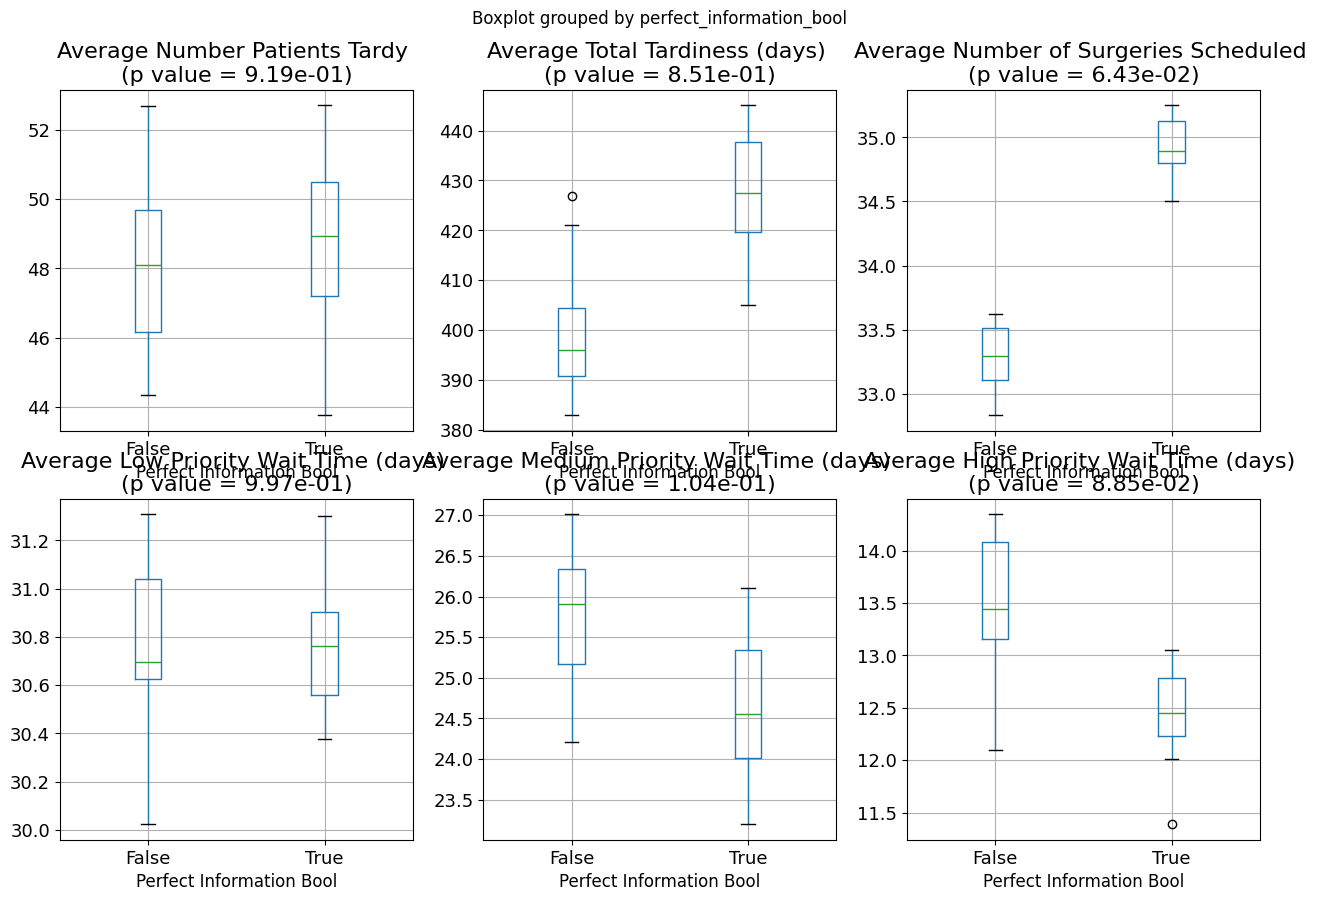

In [48]:
title_map = {
        'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
        'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
        'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
        'total tardiness': 'Average Total Tardiness (days)', 
        'number of patients tardy': 'Average Number Patients Tardy', 
        'total surgeries completed': 'Average Number of Surgeries Scheduled', 
        'total cancelled inconvenient': 'Average Number of Surgeries Cancelled \ndt Inconvenience',
        'total cancelled overtime': 'Average Number of Surgeries Cancelled \ndt Over Time',
        'cancelation proportion': 'Proportion of Surgeries Cancelled',
        'total time operating': 'Average Time Spent Operating',
        'average overtime': 'Average amount of Overtime Worked',
        'average utilisation': 'Average Session Utilisation',
    }

avg_values = pi_metrics.groupby(['iteration', 'perfect_information_bool']).agg({
    'average wait time (priority < 0.33)': 'mean', 
        'average wait_time (0.33 < priority < 0.66)': 'mean', 
        'average wait time 0.66 < priority': 'mean', 
        'total tardiness': 'mean', 
        'number of patients tardy': 'mean', 
        'total surgeries completed': 'mean',  
        'total cancelled inconvenient': 'mean', 
        'total cancelled overtime': 'mean', 
        'total time operating': 'mean', 
        'average overtime': 'mean', 
        'average utilisation': 'mean', 
}).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(categories, 0):
    #get p value
    p_val = p_vals[(p_vals['Metric'] == column) & (p_vals['perfect_information_bool'] == True)]['p-value'].iloc[0]
    formatted_p_val = "{:.2e}".format(p_val)

    avg_values.boxplot(column=column, by='perfect_information_bool', ax=axes[math.floor(i/3), i - 3*math.floor(i/3)])
    axes[math.floor(i/3), i - 3*math.floor(i/3)].set_title(f"{title_map[column]} \n(p value = {formatted_p_val})", fontsize=16)
    axes[math.floor(i/3), i - 3*math.floor(i/3)].set_xlabel('Perfect Information Bool', fontsize=12)
    # axes[math.floor(i/3), i - 3*math.floor(i/3)].set_ylabel(title_mappings[column], fontsize=12)

    axes[math.floor(i/3), i - 3*math.floor(i/3)].tick_params(axis='both', which='major', labelsize=13)

plt.suptitle('')  # Remove the default suptitle
plt.tight_layout()  # Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.4)  # Add more space between rows
plt.show()


                                        Metric  perfect_information_bool  \
0                number of surgeries scheduled                     False   
1                number of surgeries scheduled                      True   
2                     number of patients tardy                     False   
3                     number of patients tardy                      True   
4                              total tardiness                     False   
5                              total tardiness                      True   
6            average wait time 0.66 < priority                     False   
7            average wait time 0.66 < priority                      True   
8   average wait_time (0.33 < priority < 0.66)                     False   
9   average wait_time (0.33 < priority < 0.66)                      True   
10         average wait time (priority < 0.33)                     False   
11         average wait time (priority < 0.33)                      True   

    t-stati